In [1]:
library(dplyr)
library(ggplot2)
library(tidyverse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.8     ✔ purrr   0.3.4
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
root_dir <- "/data1/APA/Paul_ALS_Data/Mapper_outs_2024/"
sub_cts <- list.files(root_dir, full.names = F)
sub_cts

[1] "2024_APANET_data"           "APAlog_volcanos"           
 [3] "Astro_C9ALSvsCTRL"          "Astro_negative_control"    
 [5] "Astro_sALSvsCTRL"           "Exc_deep_C9ALSvsCTRL"      
 [7] "Exc_deep_negative_control"  "Exc_deep_sALSvsCTRL"       
 [9] "Exc_int_C9ALSvsCTRL"        "Exc_int_negative_control"  
[11] "Exc_int_sALSvsCTRL"         "Exc_upper_C9ALSvsCTRL"     
[13] "Exc_upper_negative_control" "Exc_upper_sALSvsCTRL"      
[15] "Inh_C9ALSvsCTRL"            "Inh_negative_control"      
[17] "Inh_sALSvsCTRL"             "Microglia_C9ALSvsCTRL"     
[19] "Microglia_sALSvsCTRL"       "negative_control"          
[21] "negative_controls"          "Oligo_C9ALSvsCTRL"         
[23] "Oligo_negative_control"     "Oligo_sALSvsCTRL"          
[25] "OPC_C9ALSvsCTRL"            "OPC_negative_control"      
[27] "OPC_sALSvsCTRL"

In [3]:
# remove anything containing 'negative' in sub_cts
sub_cts <- sub_cts[!grepl("negative", sub_cts)]
sub_cts <- sub_cts[!grepl("APAlog_volcanos", sub_cts)]
sub_cts <- sub_cts[!grepl("2024_APANET_data", sub_cts)]

sub_cts

[1] "Astro_C9ALSvsCTRL"     "Astro_sALSvsCTRL"      "Exc_deep_C9ALSvsCTRL" 
 [4] "Exc_deep_sALSvsCTRL"   "Exc_int_C9ALSvsCTRL"   "Exc_int_sALSvsCTRL"   
 [7] "Exc_upper_C9ALSvsCTRL" "Exc_upper_sALSvsCTRL"  "Inh_C9ALSvsCTRL"      
[10] "Inh_sALSvsCTRL"        "Microglia_C9ALSvsCTRL" "Microglia_sALSvsCTRL" 
[13] "Oligo_C9ALSvsCTRL"     "Oligo_sALSvsCTRL"      "OPC_C9ALSvsCTRL"      
[16] "OPC_sALSvsCTRL"

In [4]:
inp_df = read.table(paste0(root_dir, sub_cts[4], '/gene.txt'), header = T, sep = "\t")
head(inp_df)

,gene,npas,pval,RLDu,RLDi,REDu,REDu.pval,REDi,REDi.pval,nread.c1.1,nread.c1.2,nread.c1.3,nread.c1.4,nread.c1.5,nread.c2.1,nread.c2.2,nread.c2.3,nread.c2.4,nread.c2.5
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,B3GALT6,2,2.47e-02,0.3820,NA,0.988,8.51e-03,NA,NA,0,0,0,0,54,61,82,80,0,0
2,PUSL1,4,6.62e-06,-0.0859,NA,-1.420,1.57e-06,NA,NA,0,42,0,41,89,49,261,183,131,64
3,PRKCZ,4,2.13e-05,-0.9590,0.780,-1.190,3.90e-08,0.864,1.87e-04,14,225,118,85,545,385,829,1088,293,267
4,SKI,4,4.55e-08,0.0148,0.173,1.130,6.08e-09,-0.377,1.60e-01,5,133,49,91,152,129,243,386,90,61
5,RER1,4,3.60e-10,0.1430,-0.977,0.326,2.62e-01,-1.420,8.61e-08,0,203,34,58,164,60,380,425,141,61
6,TPRG1L,2,4.19e-02,0.0617,NA,0.632,1.47e-02,NA,NA,0,79,0,0,397,193,237,281,136,202


In [5]:
# FDR adjust the p-values, (pval) column, in the inp_df
inp_df$pval_adj = p.adjust(inp_df$pval, method = "fdr")
print(dim(inp_df))


[1] 9834   20


In [6]:
inp_df <- inp_df %>% filter(pval_adj < 0.01)
print(dim(inp_df))

[1] 4277   20


In [7]:
# let's quantify 3 things, number of genes going 3utr lengthening (REDu > 1), and number of genes going 3utr shortening (REDu < -1), 
# and number of genes going through intronic APA, (REDi < -1), we must also take into account the REDu.pval	abd REDi.pval to count only significant genes

n_genes_len <- inp_df %>% filter(REDu > 1 & REDu.pval < 0.01) %>% nrow()
n_genes_short <- inp_df %>% filter(REDu < -1 & REDu.pval < 0.01) %>% nrow()
n_genes_intronic <- inp_df %>% filter(REDi < -1 & REDi.pval < 0.01) %>% nrow()

print(n_genes_len)
print(n_genes_short)
print(n_genes_intronic)

[1] 1056
[1] 337
[1] 1471


In [9]:
volcano_plot_2 <- function(fit,selectLab, x, xlab = "Ln fold change", y, ylab = "-Log10 P-value",colCustom = NULL,
    title = "", titleLabSize = 12, border = "full",
    pCutoff = 0.01, FCcutoff = 1, pointsize= .5) {

    if (! x %in% names(fit)){
        stop(print(paste('The column', x, 'does not exist in the given dataframe.')))
    }

    if (! y %in% names(fit)){
        stop(print(paste('The column', y, 'does not exist in the given dataframe.')))
    }

    top_als_genes =  fit[['gene']][which(fit[['gene']] %in% ALSgenes)]
    top_10_genes = fit %>% arrange(desc(abs(fit[['REDu']]))) %>% head(10) %>% pull(gene)
    select_genes = c(top_als_genes, top_10_genes)

    return(EnhancedVolcano::EnhancedVolcano(fit, lab = fit[['gene']], selectLab = select_genes,
     x=x, xlab=xlab, y=y, colCustom=colCustom, ylab=ylab, title=title,
    titleLabSize=titleLabSize, border=border, pCutoff=pCutoff, FCcutoff=FCcutoff,pointSize=pointsize,
    gridlines.major = FALSE, drawConnectors = TRUE,
    gridlines.minor = FALSE,borderWidth=0.5, colAlpha=1))
}


In [10]:
ALSgenes <- c("TARDBP","C9orf72","SOD1","FUS","NEK1","OPTN","CHCHD10","SQSTM1",
  "TBK1","KIF5A","SETX","UBQLN2","MATR3","VAPB","SIGMAR1","ANXA11",
  "TUBA4A","ALS2","GRN","PFN1","CHMP2B","TIA1","ANG","SPAST","FIG4",
  "SPG11","GLE1","CCNF","ATXN2","VCP", "STMN2", "UNC13A")
  
  
keyvals <- ifelse(
    inp_df$REDu > 1, '#CC79A7',
      ifelse(inp_df$REDu < -1, '#F0E442', 'lightgrey')) # Correct color and logic for mid range

keyvals[is.na(keyvals)] <- 'lightgrey'  # Handle NA values

# Correct the naming based on the new color assignments
names(keyvals)[keyvals == '#F0E442'] <- 'highly lengthened'
names(keyvals)[keyvals == '#CC79A7'] <- 'highly shortened'
names(keyvals)[keyvals == 'lightgrey'] <- 'mid'


In [11]:
fdr_thresholds = c(1.800e-14, 4.768e-14, 6.595e-16, 2.819e-20, 1.140e-21, 9.021e-11, 1.230e-20, 2.820e-12)
cell_types = c("Astro", "Exc_deep", "Exc_int", "Exc_upper", "Inh", "Microglia", "Oligo", "OPC")

[1] "Astro : sALSvsCTRL"


Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
  grobHeight.absoluteGrob ggplot2
  grobWidth.absoluteGrob  ggplot2
  grobX.absoluteGrob      ggplot2
  grobY.absoluteGrob      ggplot2



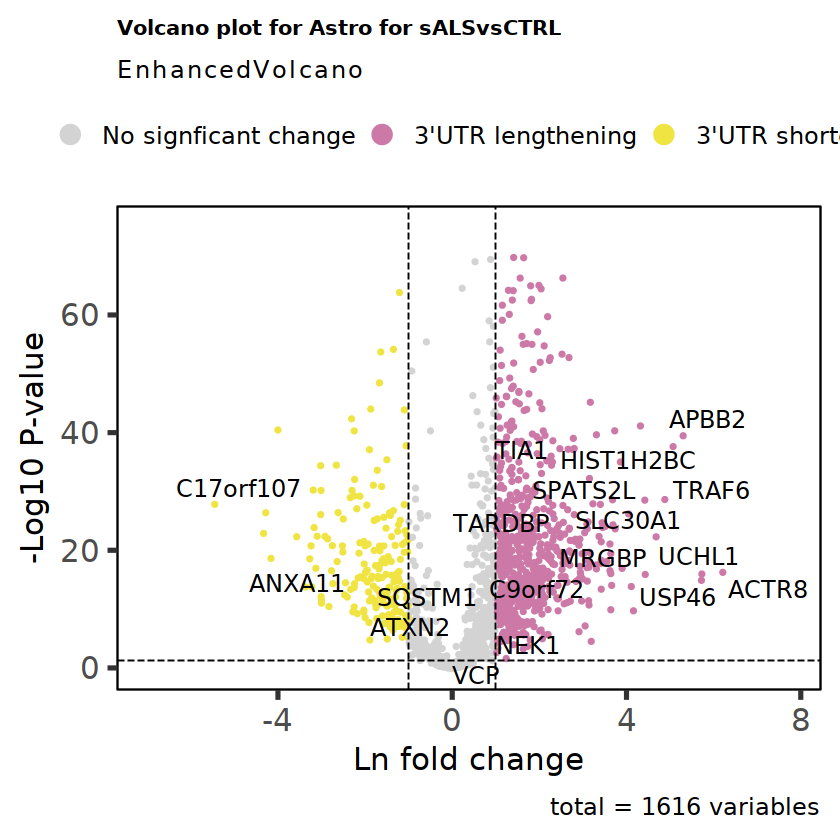

In [12]:
ct = sub_cts[2] 
condition = ifelse(grepl("C9ALS", ct), "C9ALSvsCTRL", "sALSvsCTRL")
# celltype is anything before _condition, but we might have multiple _ in the celltype name
celltype = gsub(paste0("_", condition), "", ct)
print(paste0(celltype, " : ", condition))
inp_df = read.table(paste0(root_dir, ct, '/gene.txt'), header = T, sep = "\t")
# filter based on the fdr threshold
inp_df <- inp_df %>% filter(pval < fdr_thresholds[cell_types == celltype]) %>% filter(!is.na(REDu)) %>%  filter(!is.infinite(REDu)) %>% filter(abs(REDu) < 8) %>% filter(REDu.pval > 1e-70)  # for visualization purposes
keyvals <- ifelse(
inp_df$REDu > 1 & inp_df$REDu.pval < 0.05, '#CC79A7',
    ifelse(inp_df$REDu < -1 & inp_df$REDu.pval < 0.05, '#F0E442', 'lightgrey')) 
keyvals[is.na(keyvals)] <- 'lightgrey'  # Handle NA values

# Correct the naming based on the new color assignments
names(keyvals)[keyvals == '#CC79A7'] <- "3'UTR lengthening"
names(keyvals)[keyvals == '#F0E442'] <- "3'UTR shortening"
names(keyvals)[keyvals == 'lightgrey'] <- 'No signficant change'
top_n_switches <- inp_df %>% arrange(desc(abs(REDu))) %>% slice(1:50)
top_n_switches_genes <- top_n_switches['gene']
plt <- volcano_plot_2(inp_df,
                    x='REDu',
                    y='REDu.pval',
                    colCustom = keyvals,
                    title=paste0('Volcano plot for ', celltype, ' for ', condition),
                    pCutoff = 0.05,
                    FCcutoff = 1,
                    pointsize = 1)
plt

In [31]:
# ok let's read all the gene.txt for all the sub_cts, and then get number of genes going through 3utr lengthening, shortening and intronic APA, and median of the values (REDu) and REDi
# we will plot a bar plot for the different celltypes and conditions

# generate df to rbind the results
df = data.frame(ct = character(), condition=character(), n_genes_len = numeric(), n_genes_short = numeric(),
 n_genes_intronic = numeric(), median_len = numeric(), median_short = numeric(), median_intronic = numeric(), stringsAsFactors = F)
for (ct in sub_cts){
    # get C9ALSvsCTRL or sALSvsCTRL from the ct as condition
    condition = ifelse(grepl("C9ALS", ct), "C9ALSvsCTRL", "sALSvsCTRL")
    # celltype is anything before _condition, but we might have multiple _ in the celltype name
    celltype = gsub(paste0("_", condition), "", ct)
    inp_df = read.table(paste0(root_dir, ct, '/gene.txt'), header = T, sep = "\t")
    # filter based on the fdr threshold
    inp_df <- inp_df %>% filter(pval < fdr_thresholds[cell_types == celltype])
    print(paste0(celltype, " : ", fdr_thresholds[cell_types == celltype]))
    n_genes_len <- inp_df %>% filter(REDu > 1 & REDu.pval < 0.05) %>% nrow()
    n_genes_short <- inp_df %>% filter(REDu < -1 & REDu.pval < 0.05) %>% nrow()
    n_genes_intronic <- inp_df %>% filter(REDi < -1 & REDi.pval < 0.05) %>% nrow()
    median_len <- inp_df %>% filter(REDu > 1 & REDu.pval < 0.05) %>% pull(REDu) %>% median()
    median_short <- inp_df %>% filter(REDu < -1 & REDu.pval < 0.05) %>% pull(REDu) %>% median()
    median_intronic <- inp_df %>% filter(REDi < -1 & REDi.pval < 0.05) %>% pull(REDi) %>% median()
    df = rbind(df, data.frame(ct = celltype, condition=condition, n_genes_len = n_genes_len, n_genes_short = n_genes_short,
     n_genes_intronic = n_genes_intronic, median_len = median_len, median_short = median_short, median_intronic = median_intronic))
}

[1] "Astro : 1.8e-14"
[1] "Astro : 1.8e-14"
[1] "Exc_deep : 4.768e-14"
[1] "Exc_deep : 4.768e-14"
[1] "Exc_int : 6.595e-16"
[1] "Exc_int : 6.595e-16"
[1] "Exc_upper : 2.819e-20"
[1] "Exc_upper : 2.819e-20"
[1] "Inh : 1.14e-21"
[1] "Inh : 1.14e-21"
[1] "Microglia : 9.021e-11"
[1] "Microglia : 9.021e-11"
[1] "Oligo : 1.23e-20"
[1] "Oligo : 1.23e-20"
[1] "OPC : 2.82e-12"
[1] "OPC : 2.82e-12"


In [32]:
# Define the order of cell types
celltype_order <- c("Inh", "Exc_deep", "Exc_int", "Exc_upper", "Microglia", "Oligo", "OPC", "Astro")

# Reshape the dataframe to long format for counts
df_long_counts <- df %>%
  gather(key = "gene_type", value = "count", n_genes_len, n_genes_short, n_genes_intronic)

# Reshape the dataframe to long format for medians
df_long_medians <- df %>%
  gather(key = "gene_type", value = "median", median_len, median_short, median_intronic) %>%
  # Adjust the gene_type values to match those in df_long_counts
  mutate(gene_type = sub("median_", "n_genes_", gene_type))

# Combine counts and medians into one dataframe
df_long <- left_join(df_long_counts, df_long_medians, by = c("ct", "condition", "gene_type"))

# Factor the ct variable with the specified order
df_long$ct <- factor(df_long$ct, levels = celltype_order)


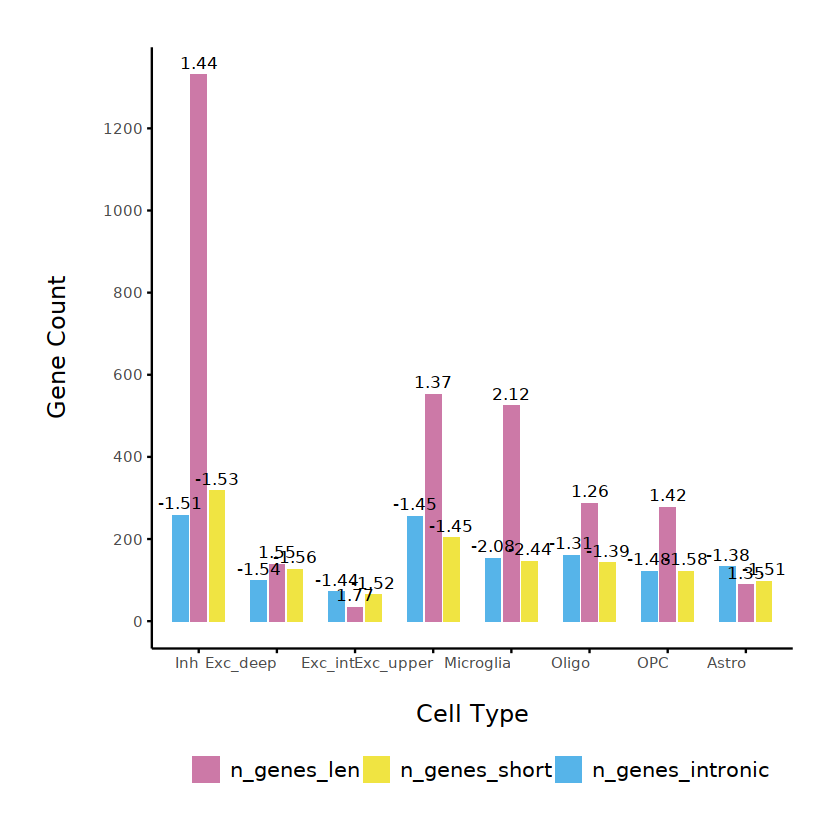

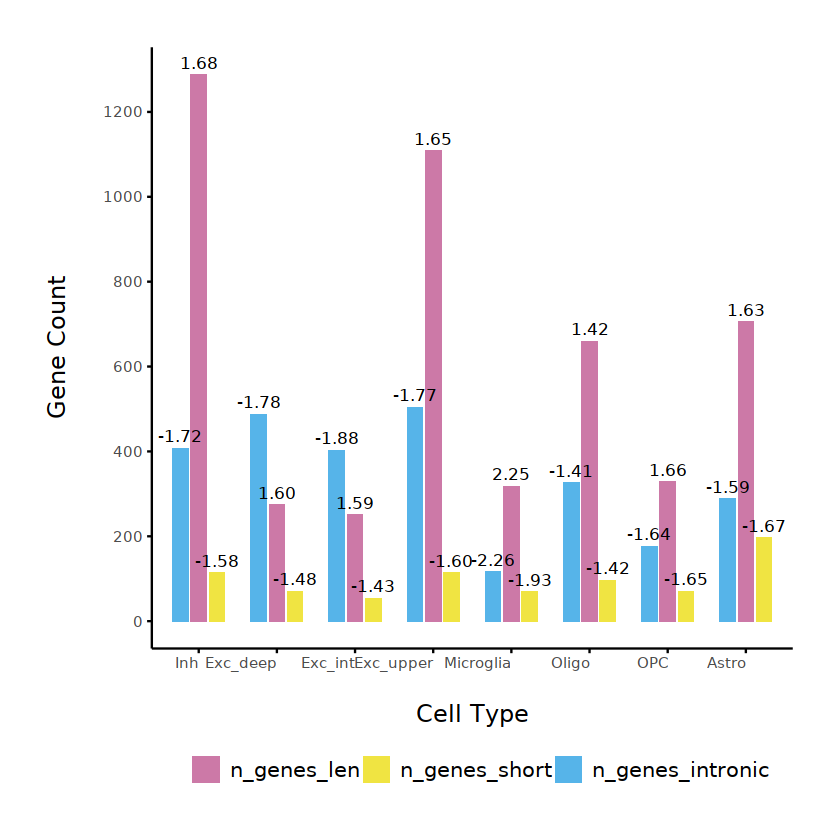

In [33]:
# Function to create and save the plot
create_plot <- function(data, condition, filename) {
  dodge_width <- 0.7
  max_count <- max(data$count, na.rm = TRUE)
  
  plot <- ggplot(data, aes(x = ct, y = count, fill = gene_type)) +
    geom_bar(stat = "identity", position = position_dodge(dodge_width), width = 0.6) +
    geom_text(aes(label = sprintf("%.2f", median), y = count), position = position_dodge(dodge_width), vjust = -0.5, color = "black", size = 3.5) +
    scale_fill_manual(values = c("n_genes_len" = "#CC79A7", "n_genes_short" = "#F0E442", "n_genes_intronic" = "#56B4E9")) +
    scale_y_continuous(breaks = seq(0, max_count, by = 200), minor_breaks = seq(0, max_count, by = 50)) + # Set y-axis breaks and minor breaks
    theme_minimal() +
    labs(x = "Cell Type", y = "Gene Count", fill = "Gene Type") +
    theme(
      strip.text.x = element_text(size = 12, face = "bold"),
      legend.position = "bottom",
      legend.title = element_blank(),
      legend.text = element_text(size = 12),
      axis.text.x = element_text(angle = 0, hjust = 1),
      axis.title.x = element_text(size = 14, margin = margin(t = 20)),
      axis.title.y = element_text(size = 14, margin = margin(r = 20)),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "white", colour = "white"),
      plot.margin = unit(c(1,1,1,1), "cm"),
      axis.line = element_line(color = "black"),
      panel.border = element_blank(),
      axis.ticks.length = unit(0.1, "cm"),
      axis.ticks = element_line(color = "black", size = 0.5)
    ) +
    coord_cartesian(clip = 'off') # Ensures no clipping of text or bars
    
  # Save the plot as a file
  ggsave(filename, plot, width = 11, height = 8.5, units = "in")
  
  # Print the plot
  print(plot)
}

# Split the data and create plots for each condition
df_C9ALSvsCTRL <- df_long %>% filter(condition == "C9ALSvsCTRL")
df_sALSvsCTRL <- df_long %>% filter(condition == "sALSvsCTRL")

# Create and save the plots
create_plot(df_C9ALSvsCTRL, "C9ALSvsCTRL", "APA_types_barplot_C9ALSvsCTRL.pdf")
create_plot(df_sALSvsCTRL, "sALSvsCTRL", "APA_types_barplot_sALSvsCTRL.pdf")


In [22]:
save_root <- '/home/aiden/codes/APA_stuff/APA_ALS_Paper/data/APA_genes_for_gsea/'

In [23]:
for (ct in sub_cts){
    # get C9ALSvsCTRL or sALSvsCTRL from the ct as condition
    condition = ifelse(grepl("C9ALS", ct), "C9ALSvsCTRL", "sALSvsCTRL")
    # celltype is anything before _condition, but we might have multiple _ in the celltype name
    celltype = gsub(paste0("_", condition), "", ct)
    inp_df = read.table(paste0(root_dir, ct, '/gene.txt'), header = T, sep = "\t")
    # filter based on the fdr threshold
    inp_df <- inp_df %>% filter(pval < fdr_thresholds[cell_types == celltype])
    print(paste0(celltype, " : ", fdr_thresholds[cell_types == celltype]))
    inp_df %>% filter(REDu > 1 & REDu.pval < 0.05) %>% filter(!is.na(REDu)) %>% filter(!is.infinite(REDu)) %>% arrange(desc(REDu)) %>% select(gene, REDu) %>% write.table(paste0(save_root,ct, "utr_lengthened_genes.txt"), sep = "\t", quote = F, row.names = F)
    inp_df %>% filter(REDu < -1 & REDu.pval < 0.05) %>% filter(!is.na(REDu)) %>% filter(!is.infinite(REDu)) %>% arrange(REDu) %>% select(gene, REDu) %>% mutate(REDu = -1 * REDu) %>% write.table(paste0(save_root,ct, "utr_shortened_genes.txt"), sep = "\t", quote = F, row.names = F)
    inp_df %>% filter(REDi < -1 & REDi.pval < 0.05) %>% filter(!is.na(REDi)) %>% filter(!is.infinite(REDi)) %>% arrange(REDi) %>% select(gene, REDi) %>% mutate(REDi = -1 * REDi) %>% write.table(paste0(save_root,ct, "intronic_APA_genes.txt"), sep = "\t", quote = F, row.names = F)
    }

[1] "Astro : 1.8e-14"
[1] "Astro : 1.8e-14"
[1] "Exc_deep : 4.768e-14"
[1] "Exc_deep : 4.768e-14"
[1] "Exc_int : 6.595e-16"
[1] "Exc_int : 6.595e-16"
[1] "Exc_upper : 2.819e-20"
[1] "Exc_upper : 2.819e-20"
[1] "Inh : 1.14e-21"
[1] "Inh : 1.14e-21"
[1] "Microglia : 9.021e-11"
[1] "Microglia : 9.021e-11"
[1] "Oligo : 1.23e-20"
[1] "Oligo : 1.23e-20"
[1] "OPC : 2.82e-12"
[1] "OPC : 2.82e-12"


In [24]:
fig_path = '/home/aiden/codes/APA_stuff/APA_ALS_Paper/data/gene_APA_volcano_plots/'

In [27]:
# let's plot volcano plots for the celltypes now,
for (ct in sub_cts){
    # get C9ALSvsCTRL or sALSvsCTRL from the ct as condition
    condition = ifelse(grepl("C9ALS", ct), "C9ALSvsCTRL", "sALSvsCTRL")
    # celltype is anything before _condition, but we might have multiple _ in the celltype name
    celltype = gsub(paste0("_", condition), "", ct)
    print(paste0(celltype, " : ", condition))
    inp_df = read.table(paste0(root_dir, ct, '/gene.txt'), header = T, sep = "\t")
    # filter based on the fdr threshold
    inp_df <- inp_df %>% filter(pval < fdr_thresholds[cell_types == celltype]) %>% filter(!is.na(REDu)) %>%  filter(!is.infinite(REDu)) %>% filter(abs(REDu) < 8) %>% filter(REDu.pval > 1e-70)  # for visualization purposes
    keyvals <- ifelse(
    inp_df$REDu > 1 & inp_df$REDu.pval < 0.05, '#CC79A7',
      ifelse(inp_df$REDu < -1 & inp_df$REDu.pval < 0.05, '#F0E442', 'lightgrey')) 
    keyvals[is.na(keyvals)] <- 'lightgrey'  # Handle NA values

    # Correct the naming based on the new color assignments
    names(keyvals)[keyvals == '#CC79A7'] <- "3'UTR lengthening"
    names(keyvals)[keyvals == '#F0E442'] <- "3'UTR shortening"
    names(keyvals)[keyvals == 'lightgrey'] <- 'No signficant change'
    top_n_switches <- inp_df %>% arrange(desc(abs(REDu))) %>% slice(1:50)
    top_n_switches_genes <- top_n_switches['gene']
    inp_df$REDu_pval_adj <- p.adjust(inp_df$REDu.pval, method = "BH")
    tmp <- inp_df$REDu.pval[inp_df$REDu_pval_adj <= 0.05]
    # remove NA from tst
    tmp <- tmp[!is.na(tmp)]
    pCutOff <- max(tmp)
    plt <- volcano_plot_2(inp_df,
                     x='REDu',
                     y='REDu.pval',
                     colCustom = keyvals,
                     title=paste0('Volcano plot for ', celltype, ' for ', condition),
                     pCutoff = pCutOff,
                     FCcutoff = 1,
                     pointsize = 1)
    ggsave(paste0(fig_path, celltype, "_", condition, "_volcano_plot4.pdf"), plt, width = 11, height = 8.5, units = "in")
    }

[1] "Astro : C9ALSvsCTRL"
[1] "Astro : sALSvsCTRL"
[1] "Exc_deep : C9ALSvsCTRL"
[1] "Exc_deep : sALSvsCTRL"
[1] "Exc_int : C9ALSvsCTRL"
[1] "Exc_int : sALSvsCTRL"
[1] "Exc_upper : C9ALSvsCTRL"
[1] "Exc_upper : sALSvsCTRL"
[1] "Inh : C9ALSvsCTRL"
[1] "Inh : sALSvsCTRL"
[1] "Microglia : C9ALSvsCTRL"
[1] "Microglia : sALSvsCTRL"
[1] "Oligo : C9ALSvsCTRL"
[1] "Oligo : sALSvsCTRL"
[1] "OPC : C9ALSvsCTRL"
[1] "OPC : sALSvsCTRL"


In [26]:
fig_path

[1] "/home/aiden/codes/APA_stuff/APA_ALS_Paper/data/gene_APA_volcano_plots/"

In [36]:
inp_df = read.table(paste0(root_dir, 'Exc_deep_C9ALSvsCTRL', '/gene.txt'), header = T, sep = "\t")
head(inp_df)

,gene,npas,pval,RLDu,RLDi,REDu,REDu.pval,REDi,REDi.pval,nread.c1.1,⋯,nread.c1.3,nread.c1.4,nread.c1.5,nread.c1.6,nread.c2.1,nread.c2.2,nread.c2.3,nread.c2.4,nread.c2.5,nread.c2.6
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,B3GALT6,2,8.39e-02,-0.3680,NA,-0.697,0.0230,NA,NA,0,⋯,0,0,54,61,61,0,90,130,0,55
2,PUSL1,3,7.02e-01,0.0777,NA,0.454,0.1530,NA,NA,0,⋯,0,41,89,49,59,100,147,126,81,50
3,MIB2,2,1.47e-20,NA,-2.560,NA,NA,-2.560,2.15e-21,0,⋯,241,35,184,165,160,190,280,338,383,211
4,PRKCZ,4,1.15e-04,-0.3940,0.487,-0.586,0.0013,0.534,1.68e-05,14,⋯,121,85,546,385,190,534,716,1151,841,444
5,SKI,2,1.30e-01,0.2520,NA,0.358,0.0358,NA,NA,5,⋯,49,91,152,129,69,122,226,241,229,195
6,RER1,4,2.78e-06,-0.1310,-1.050,0.357,0.0550,-1.340,7.88e-08,0,⋯,34,58,164,60,167,192,377,436,280,174


In [37]:
inp_df <- inp_df %>% filter(pval < fdr_thresholds[cell_types == 'Exc_deep'])
head(inp_df)

,gene,npas,pval,RLDu,RLDi,REDu,REDu.pval,REDi,REDi.pval,nread.c1.1,⋯,nread.c1.3,nread.c1.4,nread.c1.5,nread.c1.6,nread.c2.1,nread.c2.2,nread.c2.3,nread.c2.4,nread.c2.5,nread.c2.6
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,MIB2,2,1.47e-20,NA,-2.560,NA,NA,-2.560,2.15e-21,0,⋯,241,35,184,165,160,190,280,338,383,211
2,TARDBP,7,1.86e-16,-0.0014,NA,-1.490,7.29e-14,NA,NA,0,⋯,181,187,476,283,374,637,564,953,749,508
3,VPS13D,9,3.17e-23,-0.0171,-0.246,-0.429,2.86e-03,1.820,4.99e-23,12,⋯,121,72,608,260,487,953,1005,1935,925,1509
4,KAZN,8,2.97e-21,NA,1.470,NA,NA,2.250,1.72e-20,16,⋯,122,197,310,268,212,410,507,681,653,463
5,RPL11,3,3.15e-18,NA,-0.957,NA,NA,-0.961,3.32e-25,82,⋯,471,215,1290,202,575,1249,1102,2460,322,230
6,ZMYM4,6,1.57e-17,0.2880,1.220,-0.972,1.30e-04,2.090,2.35e-19,8,⋯,72,82,182,120,145,162,343,288,361,214


In [38]:
tmp <- inp_df %>% filter(REDi < -1 & REDi.pval < 0.05) 
median(tmp$REDi)

[1] -1.54

In [41]:
tmp <- inp_df %>% filter(REDu < -1 & REDu.pval < 0.05)
median(tmp$REDu)

[1] -1.56

In [42]:
tmp <- inp_df %>% filter(REDu > +1 & REDu.pval < 0.05)
median(tmp$REDu)

[1] 1.55